<a href="https://colab.research.google.com/github/orion-gamma-kplr/MachineLLearning/blob/main/Capstone%20Project/Capstone_Project_Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction

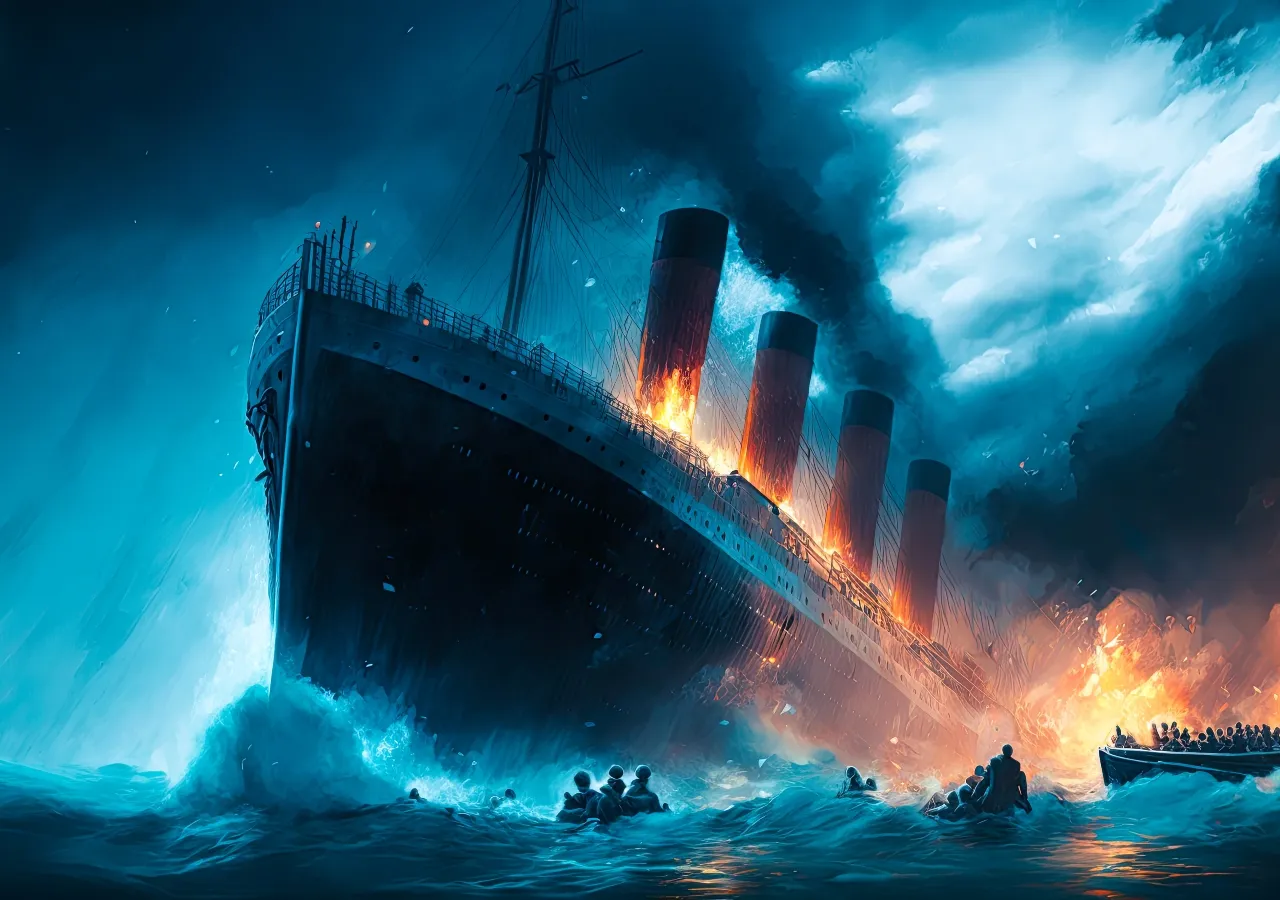

- Le 15 avril 1912, lors de son voyage inaugural, le Titanic a sombré après avoir heurté un iceberg, entraînant la mort de 1502 passagers et membres d'équipage sur les 2224 présents à bord. Cela correspond à un taux de survie de 32 %.

- L'une des raisons pour lesquelles ce naufrage a entraîné autant de pertes en vies humaines est qu'il n'y avait pas suffisamment de canots de sauvetage pour les passagers et l'équipage.

- Bien que la chance ait joué un rôle dans la survie lors du naufrage, certains groupes de personnes avaient plus de chances de survivre que d'autres, tels que les femmes, les enfants et les membres de la classe supérieure.

## **Importer les Modules**

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## **Définir l'ensemble de test et d'entraînement.**

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

## **Analyse en décrivant les données**

* Pandas aide également à décrire les ensembles de données en répondant aux questions suivantes dès le début de notre projet.

**Quelles caractéristiques sont disponibles dans l'ensemble de données ?**

- Nous prenons note des noms des caractéristiques pour pouvoir les manipuler directement ou les analyser.

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Quelles caractéristiques sont catégorielles ?**

- Ces valeurs classifient les échantillons en ensembles d'échantillons similaires.
- Parmi les caractéristiques catégorielles, les valeurs peuvent être nominales, ordinales, de ratio ou basées sur un intervalle.
- Cela nous aide, entre autres choses, à sélectionner les graphiques appropriés pour la visualisation.

- Catégorielles : Survived, Sex et Embarked. Ordinale : Pclass.

**Quelles caractéristiques sont numériques ?**

- Quelles caractéristiques sont numériques ? Ces valeurs varient d'un échantillon à l'autre.
* Parmi les caractéristiques numériques, les valeurs peuvent être discrètes, continues ou basées sur des séries chronologiques.
- Cela nous aide, entre autres choses, à sélectionner les graphiques appropriés pour la visualisation.

- Continues : Age, Fare. Discrètes : SibSp, Parch.

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Quelles caractéristiques contiennent des types de données mixtes ?**

- Il s'agit de données numériques et alphanumériques au sein d'une même caractéristique. Ce sont des candidats pour l'objectif de correction.

- La caractéristique "Ticket" est un mélange de types de données numériques et alphanumériques. "Cabin" est alphanumérique.

**Quelles caractéristiques peuvent contenir des erreurs ou des fautes de frappe ?**

- Il est plus difficile de vérifier cela pour un grand ensemble de données, cependant, en examinant quelques échantillons d'un ensemble de données plus petit, cela peut nous indiquer directement quelles caractéristiques peuvent nécessiter une correction.

- La caractéristique "Name" peut contenir des erreurs ou des fautes de frappe car il existe plusieurs façons de décrire un nom, y compris les titres, les parenthèses rondes et les guillemets utilisés pour les noms alternatifs ou abrégés.

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Quelles caractéristiques contiennent des valeurs vides, nulles ou manquantes ?**

Celles-ci nécessiteront une correction.

- Les caractéristiques Cabin > Age > Embarked contiennent plusieurs valeurs nulles dans cet ordre pour l'ensemble de données d'entraînement.
- Les caractéristiques Cabin > Age sont incomplètes dans le cas de l'ensemble de données de test.

**Quels sont les types de données pour différentes caractéristiques ?**

Cela nous aide dans le cadre de l'objectif de conversion.

- Sept caractéristiques sont des entiers ou des nombres à virgule flottante. Six dans le cas de l'ensemble de données de test.
- Cinq caractéristiques sont des chaînes de caractères (objets).

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**Quelle est la distribution des valeurs des caractéristiques numériques à travers les échantillons ?**

Cela nous aide à déterminer, entre autres premières observations, à quel point l'ensemble de données d'entraînement est représentatif du domaine du problème réel.

- Le nombre total d'échantillons est de 891, ce qui représente 40 % du nombre réel de passagers à bord du Titanic (2 224).
- "Survived" est une caractéristique catégorielle avec des valeurs 0 ou 1.
- Environ 38 % des échantillons ont survécu, ce qui est représentatif du taux de survie réel de 32 %.
- La plupart des passagers (> 75 %) ne voyageaient pas avec leurs parents ou leurs enfants.
- Environ 30 % des passagers avaient des frères et/ou sœurs ou un conjoint à bord.
- Les tarifs variaient considérablement, avec quelques passagers (< 1 %) payant jusqu'à 512 $.
- Peu de passagers âgés (< 1 %) se trouvaient dans la tranche d'âge de 65 à 80 ans.

In [8]:
#afficher un résumé statistique des données
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Quelle est la distribution des caractéristiques catégorielles ?**

- Les noms sont uniques dans l'ensemble de données (nombre de comptes = nombre d'éléments uniques = 891).
- La variable "Sex" a deux valeurs possibles, avec 65 % d'hommes (valeur la plus fréquente = "male", fréquence = 577/nombre de comptes = 891).
- Les valeurs de "Cabin" comportent plusieurs doublons dans les échantillons. Plusieurs passagers partageaient éventuellement une cabine.
- "Embarked" prend trois valeurs possibles. Le port S a été utilisé par la plupart des passagers (valeur la plus fréquente = "S").
- La caractéristique "Ticket" a un taux élevé (22 %) de valeurs en double (nombre d'éléments uniques = 681).

In [25]:
 #afficher un résumé statistique des données contenues dans les colonnes catégorielles (non numériques)
train_df[['Sex','Embarked']].describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


### **Hypothèses basées sur l'analyse des données**

Nous formulons les hypothèses suivantes basées sur l'analyse des données effectuée jusqu'à présent. Nous devrons peut-être valider ces hypothèses plus avant avant de prendre des mesures appropriées.

**Corrélation.**

Nous souhaitons savoir dans quelle mesure chaque caractéristique est corrélée à la survie. Nous voulons faire cela tôt dans notre projet et mettre en correspondance ces corrélations rapides avec les corrélations modélisées plus tard dans le projet.

**Complétion.**

1. Nous souhaitons peut-être compléter la caractéristique "Age" car elle est certainement corrélée à la survie.
2. Nous souhaitons peut-être compléter la caractéristique "Embarked" car elle pourrait également être corrélée à la survie ou à une autre caractéristique importante.

**Correction.**

1. Nous pourrions exclure la caractéristique "Ticket" de notre analyse car elle contient un taux élevé de doublons (22 %) et il n'y a peut-être pas de corrélation entre "Ticket" et la survie.
2. Nous pourrions exclure la caractéristique "Cabin" car elle est très incomplète ou contient de nombreuses valeurs nulles tant dans l'ensemble de données d'entraînement que de test.
3. "PassengerId" peut être exclu de l'ensemble de données d'entraînement car il ne contribue pas à la survie.
4. La caractéristique "Name" est relativement non standard et peut ne pas contribuer directement à la survie, donc elle peut être exclue.

**Création.**

1. Nous pourrions créer une nouvelle caractéristique appelée "Family" basée sur "Parch" et "SibSp" pour obtenir le nombre total de membres de la famille à bord.
2. Nous pourrions modifier la caractéristique "Name" pour extraire le titre en tant que nouvelle caractéristique.
3. Nous pourrions créer une nouvelle caractéristique pour les groupes d'âge. Cela transforme une caractéristique numérique continue en une caractéristique catégorielle ordonnée.
4. Nous pourrions également créer une caractéristique pour les fourchettes de tarifs si cela aide notre analyse.

**Classification.**

Nous pouvons également ajouter à nos hypothèses basées sur la description du problème notée précédemment.

1. Les femmes (Sexe=femme) avaient plus de chances de survivre.
2. Les enfants (Âge<?) avaient plus de chances de survivre.
3. Les passagers de la classe supérieure (Pclass=1) avaient plus de chances de survivre.

## **Analyse par la création de tableaux croisés**

Pour confirmer certaines de nos observations et hypothèses, nous pouvons rapidement analyser les corrélations entre nos caractéristiques en créant des tableaux croisés. Nous ne pouvons le faire qu'à cette étape pour les caractéristiques qui n'ont aucune valeur vide. Cela a également du sens de le faire uniquement pour les caractéristiques qui sont de type catégoriel (Sexe), ordinal (Pclass) ou discret (SibSp, Parch).

- **Pclass** Nous observons une corrélation significative (>0,5) entre Pclass=1 et Survived (classification #3). Nous décidons d'inclure cette caractéristique dans notre modèle.
- **Sexe** Nous confirmons l'observation faite lors de la définition du problème selon laquelle les femmes (Sexe=femme) ont un taux de survie très élevé, soit 74 % (classification #1).
- **SibSp et Parch** Ces caractéristiques ont une corrélation nulle pour certaines valeurs. Il serait peut-être préférable de dériver une nouvelle caractéristique ou un ensemble de caractéristiques à partir de ces caractéristiques individuelles (création #1).

In [26]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [27]:
#fill_here
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [28]:
#fill_here
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [29]:
#fill_here
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## **Analyse par la visualisation des données**

Nous pouvons maintenant continuer à confirmer certaines de nos hypothèses en utilisant des visualisations pour analyser les données.

### **Corrélation entre les caractéristiques numériques**

Commençons par comprendre les corrélations entre les caractéristiques numériques et notre objectif de solution (Survived).

Un histogramme est utile pour analyser les variables numériques continues telles que l'âge, où la création de plages ou de catégories permettra d'identifier des motifs utiles. L'histogramme peut indiquer la répartition des échantillons à l'aide de bacs définis automatiquement ou de plages également réparties. Cela nous aide à répondre à des questions relatives à des groupes spécifiques (les nourrissons ont-ils un meilleur taux de survie ?)

Notez que l'axe des abscisses dans les visualisations en histogramme représente le nombre d'échantillons ou de passagers.

**Observations.**

- Les nourrissons (Âge <= 4) ont eu un taux de survie élevé.
- Les passagers les plus âgés (Âge = 80) ont survécu.
- Un grand nombre de jeunes de 15 à 25 ans n'ont pas survécu.
- La plupart des passagers ont entre 15 et 35 ans.

**Décisions.**

Cette analyse simple confirme nos hypothèses en tant que décisions pour les étapes ultérieures du flux de travail.

- Nous devrions prendre en compte l'âge (notre hypothèse de classification #2) dans la formation de notre modèle.
- Compléter les valeurs manquantes de la caractéristique "Âge" (compléter #1).
- Nous devrions diviser les groupes d'âge en catégories (création #3).

<Axes: xlabel='Age', ylabel='Count'>

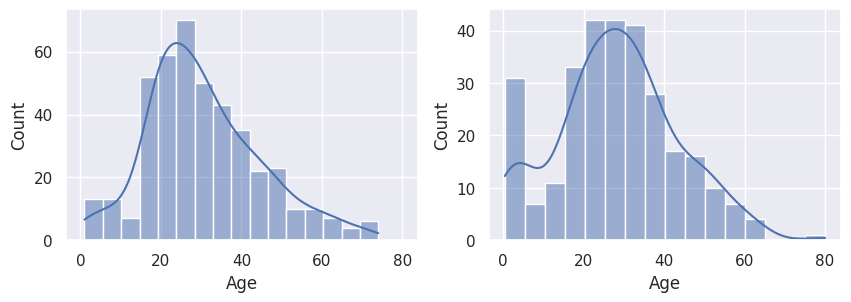

In [82]:
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(10,3))
sns.histplot(data=train_df.query("Survived==0"), x='Age',kde=True, ax=axes[0])
sns.histplot(data=train_df.query("Survived==1"), x='Age',kde=True, ax=axes[1])

### **Corrélation entre les caractéristiques numériques et ordinales**

Nous pouvons combiner plusieurs caractéristiques pour identifier des corrélations à l'aide d'un seul graphique. Cela peut être fait avec des caractéristiques numériques et catégorielles qui ont des valeurs numériques.

**Observations.**

- Pclass=3 avait le plus de passagers, cependant la plupart n'ont pas survécu. Cela confirme notre hypothèse de classification #2.
- Les passagers bébés dans Pclass=2 et Pclass=3 ont principalement survécu. Cela confirme davantage notre hypothèse de classification #2.
- La plupart des passagers de Pclass=1 ont survécu. Cela confirme notre hypothèse de classification #3.
- Pclass varie en termes de répartition d'âge des passagers.

**Décisions.**

- Prendre en compte Pclass pour la formation du modèle.

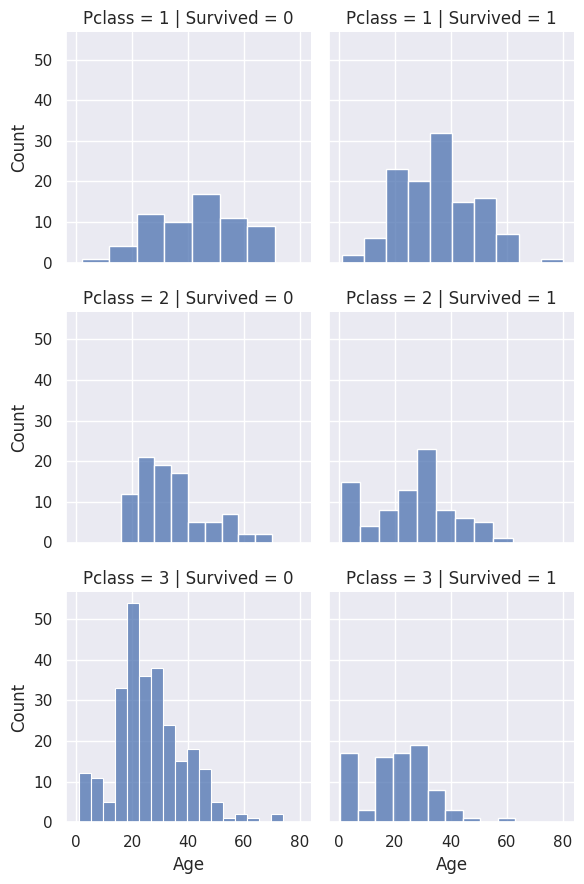

In [86]:
g = sns.FacetGrid(train_df, col="Survived",  row="Pclass")
g.map_dataframe(sns.histplot, x="Age")

### Corrélation entre les caractéristiques catégorielles

Nous pouvons maintenant corréler les caractéristiques catégorielles avec notre objectif de solution.

**Observations.**

- Les passagers de sexe féminin ont eu un taux de survie beaucoup plus élevé que les hommes. Confirme notre hypothèse de classification (#1).
- Exception pour Embarked=C où les hommes ont eu un taux de survie plus élevé. Cela pourrait être une corrélation entre Pclass et Embarked, et par conséquent, entre Pclass et Survived, pas nécessairement une corrélation directe entre Embarked et Survived.
- Les hommes ont eu un meilleur taux de survie dans Pclass=3 par rapport à Pclass=2 pour les ports C et Q. Compléter (#2).
- Les ports d'embarquement ont des taux de survie variables pour Pclass=3 et parmi les passagers masculins. Corrélation (#1).

**Décisions.**

- Ajouter la caractéristique "Sex" à la formation du modèle.
- Compléter et ajouter la caractéristique "Embarked" à la formation du modèle.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


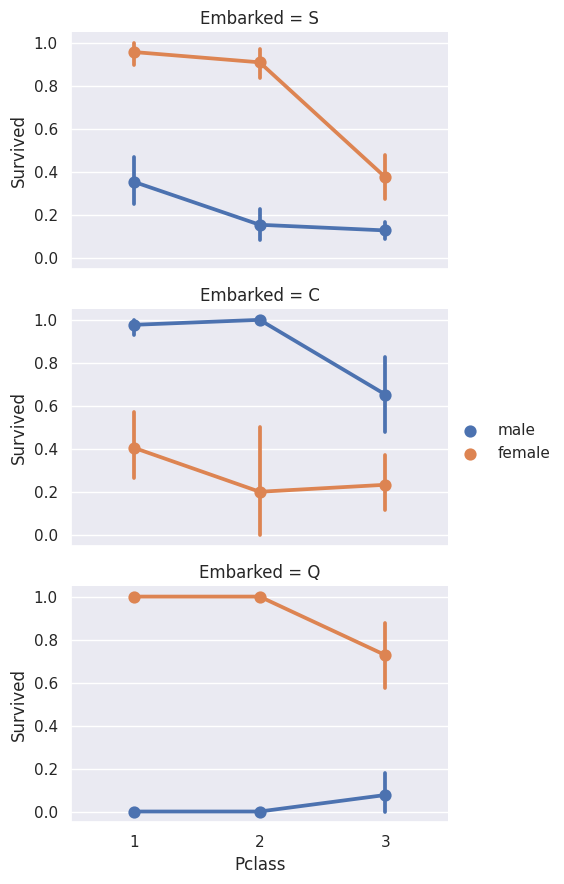

In [87]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked',  aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### **Corrélation entre les caractéristiques catégorielles et numériques**

Nous souhaitons également corréler les caractéristiques catégorielles (avec des valeurs non numériques) et les caractéristiques numériques. Nous pouvons prendre en compte la corrélation entre Embarked (catégorielle non numérique), Sex (catégorielle non numérique), Fare (numérique continue) et Survived (catégorielle numérique).

**Observations.**

- Les passagers ayant payé un tarif plus élevé ont eu une meilleure survie. Cela confirme notre hypothèse pour la création (#4) des fourchettes de tarifs.
- Le port d'embarquement est corrélé aux taux de survie. Cela confirme les corrélations (#1) et les complétions (#2).

**Décisions.**

- Envisager la création de catégories pour la caractéristique "Fare".

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


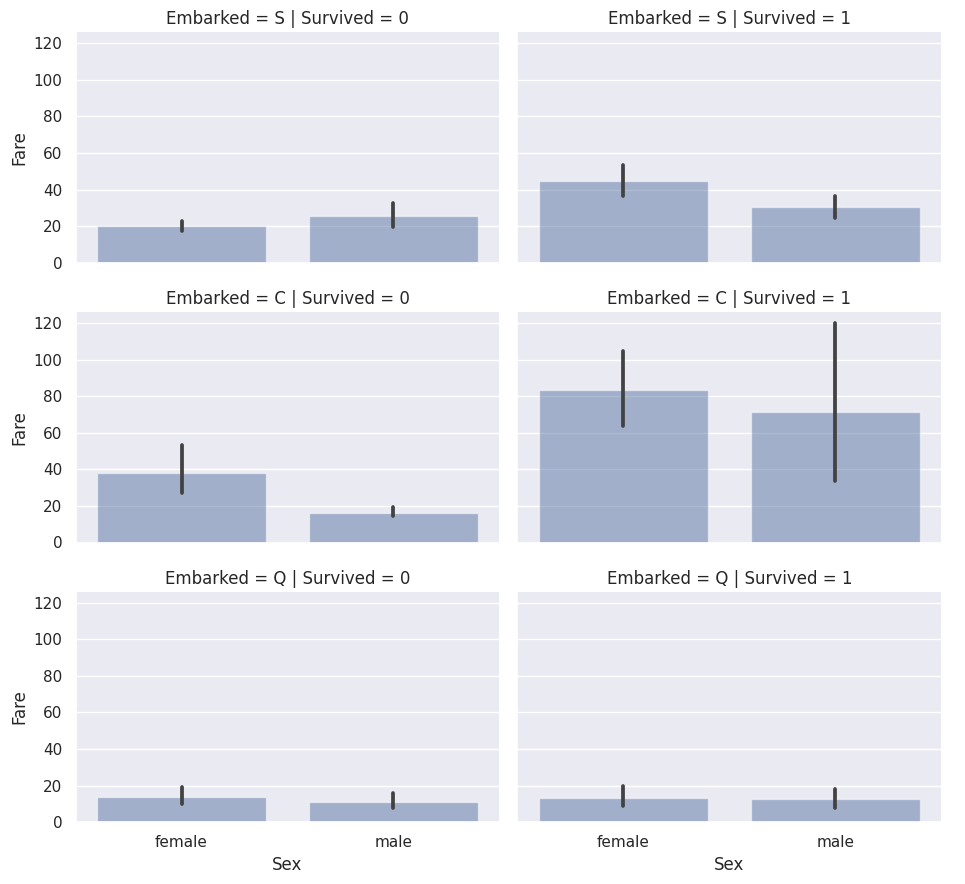

In [88]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5)
grid.add_legend()

## **Traitement des données**

- Nous avons recueilli plusieurs hypothèses et décisions concernant nos ensembles de données et les exigences de la solution.
- Jusqu'à présent, nous n'avons pas eu à modifier une seule caractéristique ou valeur pour arriver à ces hypothèses et décisions.
- Exécutons maintenant nos décisions et hypothèses pour les objectifs de correction, de création et de complétion.

### Correction en supprimant des caractéristiques

- C'est un bon objectif de départ à exécuter. En supprimant des caractéristiques, nous traitons moins de points de données. Cela accélère notre notebook et facilite l'analyse.

- Sur la base de nos hypothèses et décisions, nous voulons supprimer les caractéristiques "Cabin" (correction #2) et "Ticket" (correction #1).

- Notez que lorsque cela est applicable, nous effectuons des opérations sur les ensembles de données d'entraînement et de test ensemble pour rester cohérents.

In [303]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### **Création d'une nouvelle caractéristique à partir des existantes**

Nous souhaitons analyser si la caractéristique "Name" peut être modifiée pour extraire les titres et tester la corrélation entre les titres et la survie, avant de supprimer les caractéristiques "Name" et "PassengerId".

Dans le code suivant, nous extrayons la caractéristique "Title" à l'aide d'expressions régulières. Le motif d'expression régulière `(\w+\.)` correspond au premier mot qui se termine par un point à l'intérieur de la caractéristique "Name". L'indicateur `expand=False` renvoie un DataFrame.

**Observations.**

Lorsque nous traçons les caractéristiques "Title", "Age" et "Survived", nous constatons les observations suivantes :

- La plupart des titres regroupent les groupes d'âge avec précision. Par exemple : le titre "Master" a une moyenne d'âge de 5 ans.
- La survie varie légèrement parmi les groupes d'âge des titres.
- Certains titres ont principalement survécu (Mme, Lady, Sir) ou n'ont pas survécu (Don, Rev, Jonkheer).

**Décision.**

- Nous décidons de conserver la nouvelle caractéristique "Title" pour l'entrainement du modèle.

In [304]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


**Nous pouvons remplacer de nombreux titres par un nom plus courant ou les classer comme étant "Rare".**

In [305]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


**Nous pouvons convertir les titres catégoriques en valeurs ordinales.**

In [306]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'].replace(title_mapping,inplace=True)
    print(dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

**Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.**

In [307]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### **Conversion d'une caractéristique catégorielle**

- Nous pouvons maintenant convertir les caractéristiques qui contiennent des chaînes de caractères en valeurs numériques.
- Cela est nécessaire pour la plupart des algorithmes de modélisation.
- Cela nous aidera également à atteindre l'objectif de complétion des caractéristiques.

- Commençons par convertir la caractéristique "Sexe" en une nouvelle caractéristique appelée "Genre" où femme=1 et homme=0.

In [308]:
sex_mapping = {"male": 0, "female": 1}
for dataset in combine:
    dataset['Sex'].replace(sex_mapping,inplace=True)
#    dataset.rename(columns={'Sex':'Genre'},inplace=True)
    print(dataset.head())
train_df.head()

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      1
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      2
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      1
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0          892       3    0  34.5      0      0   7.8292        Q      1
1          893       3    1  47.0      1      0   7.0000        S      3
2          894       2    0  62.0      0      0   9.6875        Q      1
3          895       3    0  27.0      0      0   8.6625        S      1
4          896       3    1  22.0      1      1  12.2875        S      3


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### **Complétion d'une caractéristique numérique continue**

- Nous devons maintenant commencer à estimer et à compléter les caractéristiques ayant des valeurs manquantes ou nulles.
- Nous allons d'abord le faire pour la caractéristique "Âge" (Age).

- Nous pouvons envisager trois méthodes pour compléter une caractéristique numérique continue.

1. Une façon simple consiste à générer des nombres aléatoires entre la moyenne et [l'écart type](https://fr.wikipedia.org/wiki/%C3%89cart_type).

2. Une méthode plus précise pour deviner les valeurs manquantes consiste à utiliser d'autres caractéristiques corrélées. Dans notre cas, nous notons la corrélation entre l'âge, le genre et la classe. Nous pouvons deviner les valeurs de l'âge en utilisant les valeurs médianes de l'âge pour chaque combinaison de classe et de genre. Par exemple, la médiane de l'âge pour la classe=1 et le genre=0, la classe=1 et le genre=1, etc.

3. Combiner les méthodes 1 et 2. Ainsi, au lieu de deviner les valeurs d'âge en fonction de la médiane, nous utilisons des nombres aléatoires entre la moyenne et l'écart type, en fonction des combinaisons de classe et de genre.

- Les méthodes 1 et 3 introduiront du bruit aléatoire dans nos modèles. Les résultats de plusieurs exécutions pourraient varier. Nous préférerons la méthode 2.

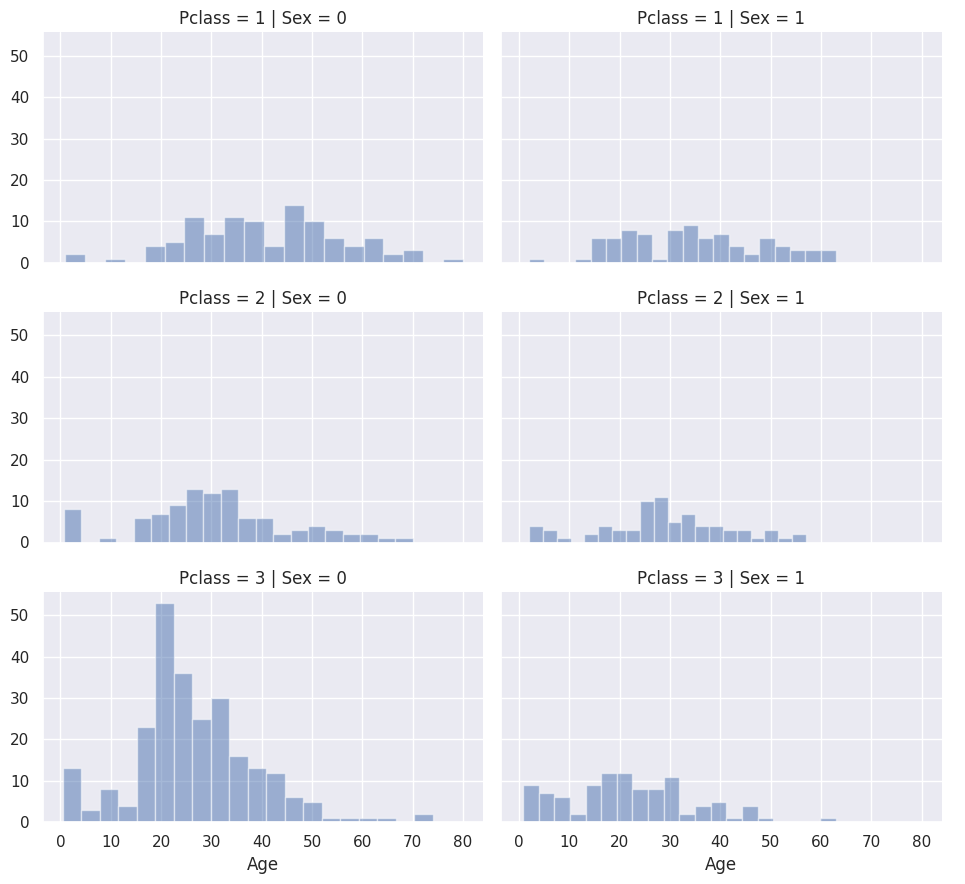

In [309]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex',aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

**Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.**

In [310]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

**Maintenant, nous itérons sur le genre (0 ou 1) et la classe (1, 2, 3) pour calculer les valeurs estimées de l'âge pour les six combinaisons.**

In [311]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.mean()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = round(age_guess, 2)

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


**Créons maintenant des groupes d'âge (Age bands) et déterminons les corrélations avec la survie (Survived).**

In [312]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


**Remplaçons maintenant la caractéristique "Âge" par des valeurs ordinales basées sur ces groupes d'âge.**

In [313]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0

    #fill_here = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32) , 'Age'] = 1
    #fill_here  = 2
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    #fill_here  = 3
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3

    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [314]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### **Créer une nouvelle caractéristique en combinant des caractéristiques existantes**

- Nous pouvons créer une nouvelle caractéristique appelée "FamilySize" qui combine les caractéristiques "Parch" et "SibSp".(FamilySize=SibSp+Parch+1)
- Cela nous permettra de supprimer les caractéristiques "Parch" et "SibSp" de nos ensembles de données.

In [315]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


**Nous pouvons créer une autre caractéristique appelée "IsAlone".**

In [316]:
for dataset in combine:
    dataset['IsAlone']= (dataset['FamilySize']==1).astype(int)
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


**Supprimons les caractéristiques "Parch", "SibSp" et "FamilySize" en faveur de la caractéristique "IsAlone".**

In [317]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


**Nous pouvons également créer une caractéristique artificielle en combinant Pclass et Age.**

In [318]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Complétion d'une caractéristique catégorielle

- La caractéristique "Embarked" prend des valeurs S, Q, C en fonction du port d'embarquement.
- Notre ensemble de données d'entraînement comporte deux valeurs manquantes. Nous les complétons simplement en utilisant la valeur la plus courante.

In [319]:
freq_port = train_df['Embarked'].mode()[0]
freq_port

'S'

In [320]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    print(dataset)
#fill_here

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

     Survived  Pclass  Sex  Age     Fare Embarked  Title  IsAlone  Age*Class
0           0       3    0    1   7.2500        S      1        0          3
1           1       1    1    2  71.2833        C      3        0          2
2           1       3    1    1   7.9250        S      2        1          3
3           1       1    1    2  53.1000        S      3        0          2
4           0       3    0    2   8.0500        S      1        1          6
..        ...     ...  ...  ...      ...      ...    ...      ...        ...
886         0       2    0    1  13.0000        S      5        1          2
887         1       1    1    1  30.0000        S      2        1          1
888         0       3    1    1  23.4500        S      2        0          3
889         1       1    0    1  30.0000        C      1        1          1
890         0       3    0    1   7.7500        Q      1        1          3

[891 rows x 9 columns]
     PassengerId  Pclass  Sex  Age      Fare Embarke

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


**Nous pouvons maintenant convertir la caractéristique "EmbarkedFill" en créant une nouvelle caractéristique numérique appelée "Port".**

In [321]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


## **Complétion rapide et conversion d'une caractéristique numérique**

- Nous pouvons maintenant compléter la caractéristique "Fare" pour la seule valeur manquante dans l'ensemble de données de test en utilisant le mode pour obtenir la valeur qui apparaît le plus fréquemment pour cette caractéristique. Nous faisons cela en une seule ligne de code.

- Notez que nous ne créons pas de nouvelle caractéristique intermédiaire ni n'effectuons d'autres analyses pour la corrélation afin de deviner la caractéristique manquante, car nous remplaçons une seule valeur. L'objectif de complétion atteint les exigences souhaitées pour que l'algorithme du modèle fonctionne sur des valeurs non nulles.

- Nous pouvons également arrondir le tarif à deux décimales car il représente une devise.

In [322]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


**Nous pouvons maintenant créer la caractéristique "FareBand".**

In [323]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


**Convertissez la caractéristique "Fare" en valeurs ordinales basées sur la caractéristique "FareBand".**

In [324]:
for dataset in combine:
      dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0

    #fill_here = 1
      dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454) , 'Fare'] = 1
    #fill_here  = 2
      dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    #fill_here  = 3
      dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

      dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


## **Modélisation, prédiction et résolution**

- Maintenant, nous sommes prêts à entraîner un modèle et à prédire la solution requise. Il existe plus de 60 algorithmes de modélisation prédictive parmi lesquels choisir.
- Nous devons comprendre le type de problème et les exigences de la solution pour réduire notre choix à quelques modèles que nous pouvons évaluer.
- Notre problème est un problème de classification et de régression. Nous voulons identifier la relation entre la variable de sortie (Survécu ou non) avec les autres variables ou caractéristiques (Genre, Âge, Port...).
- Nous effectuons également une catégorie d'apprentissage automatique appelée apprentissage supervisé, car nous entraînons notre modèle avec un ensemble de données donné.
Avec ces deux critères - Apprentissage supervisé et Classification , nous pouvons réduire notre choix de modèles à quelques-uns. Cela inclut :

    - Régression logistique
    - KNN ou k-plus proches voisins
    - Machines à vecteurs de support (SVM)
    - Arbre de décision
    - Forêt aléatoire (Random Forest)

In [333]:
X_train = train_df.drop("Survived", axis=1)
print(train_df.drop("Survived", axis=1))
print(np.array(train_df["Survived"]).reshape(1,891))
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

     Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  Age*Class
0         3    0    1     0         0      1        0          3
1         1    1    2     3         1      3        0          2
2         3    1    1     1         0      2        1          3
3         1    1    2     3         0      3        0          2
4         3    0    2     1         0      1        1          6
..      ...  ...  ...   ...       ...    ...      ...        ...
886       2    0    1     1         0      5        1          2
887       1    1    1     2         0      2        1          1
888       3    1    1     2         0      2        0          3
889       1    0    1     2         1      1        1          1
890       3    0    1     0         2      1        1          3

[891 rows x 8 columns]
[[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0
  1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
  0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 

((891, 8), (891,), (418, 8))

In [331]:
# Logistic Regression
#créer le modèle de régression logistique
model=LogisticRegression()
#Entrainer le modèle
model.fit(X_train,Y_train)
Y_pred_LR = model.predict(X_test)
acc_log = round(model.score(X_train, Y_train) * 100, 2)
acc_log

81.37

Nous pouvons utiliser la régression logistique pour valider nos hypothèses et décisions concernant la création et la complétion des caractéristiques. Cela peut être fait en calculant le coefficient des caractéristiques dans la fonction de décision.

In [329]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(model.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*Class,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


Les coefficients positifs augmentent le log-odds de la réponse (et donc augmentent la probabilité), et les coefficients négatifs diminuent le log-odds de la réponse (et donc diminuent la probabilité).

- Le sexe (Sexe) a le coefficient positif le plus élevé, ce qui implique que lorsque la valeur du sexe augmente (de masculin : 0 à féminin : 1), la probabilité de Survived=1 augmente le plus.
- Inversement, lorsque Pclass (Classe) augmente, la probabilité de Survived=1 diminue le plus.
- De cette manière, "Age*Class" est une bonne caractéristique artificielle à modéliser car elle a la deuxième corrélation négative la plus élevée avec Survived.
- Il en va de même pour "Title" qui a la deuxième corrélation positive la plus élevée.

In [334]:
# Support Vector Machines

#créer le modèle
model=SVC()
#Entrainer le modèle
model.fit(X_train,Y_train)
#Entrainer le modèle
#appliquer la méthode predict sur X_test
Y_pred_SVM = model.predict(X_test)
acc_svc = round(model.score(X_train, Y_train) * 100, 2)
acc_svc

82.83

In [336]:
#KNN
#créer le modèle
model=KNeighborsClassifier()
#Entrainer le modèle
model.fit(X_train,Y_train)

Y_pred_KNN = model.predict(X_test)
acc_knn = round(model.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

In [338]:
# Decision Tree

#créer le modèle
model=DecisionTreeClassifier()
#Entrainer le modèle
model.fit(X_train,Y_train)
Y_pred_DT =  model.predict(X_test)#appliquer la méthode predict sur X_test
acc_decision_tree = round(model.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

In [339]:
# Random Forest

#créer le modèle de régression logistique
model=RandomForestClassifier()
#Entrainer le modèle
model.fit(X_train,Y_train)
Y_pred_RF =  model.predict(X_test)#appliquer la méthode predict sur X_test
acc_random_forest = round(model.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

# **Model evaluation**

In [340]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
4,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,82.83
2,Logistic Regression,81.37


In [341]:
import pandas as pd

# Charger les données de test et le fichier gender_submission
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('gender_submission.csv')
# Fusionner les données de test avec les étiquettes cibles à l'aide de la colonne 'PassengerId' comme clé de jointure
merged_data = test_data.merge(submission_data, on='PassengerId')
# Sélectionner la colonne cible (étiquette) 'Survived' en tant que Y_test
Y_test = merged_data['Survived']


# **Evaluation des Modèles avec la Matrice de Confusion**

### **Logistic Regression**

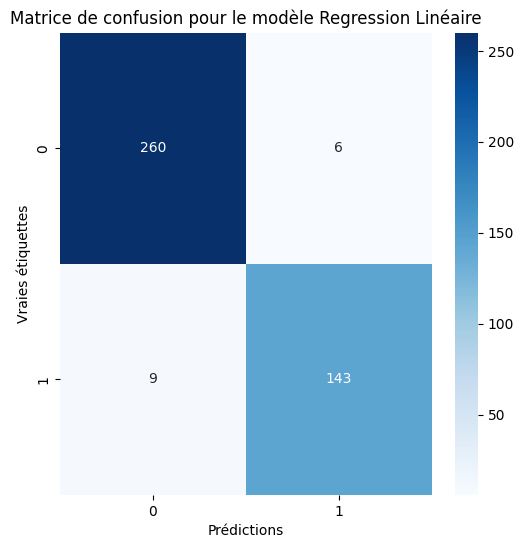

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       266
           1       0.96      0.94      0.95       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Calcul de la matrice de confusion
#fill_here
# Affichage de la matrice de confusion sous forme de heatmap avec Seaborn

#fill_here

# Affichage du rapport de classification(precision,recall et f1-score   )

#fill_here

### **SVM**

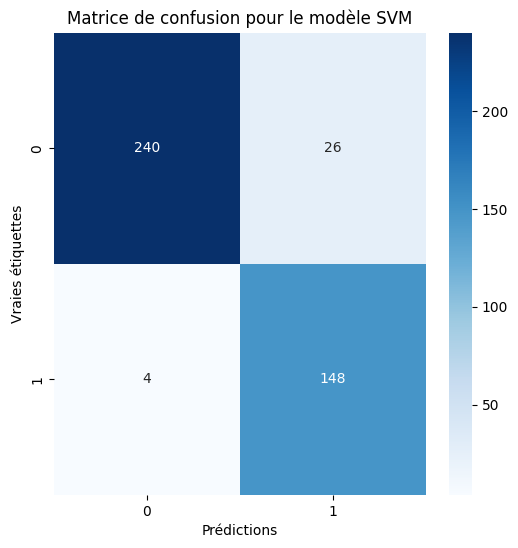

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       266
           1       0.85      0.97      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.94      0.92       418
weighted avg       0.94      0.93      0.93       418



In [ ]:
# Calcul de la matrice de confusion
#fill_here
# Affichage de la matrice de confusion sous forme de heatmap avec Seaborn

#fill_here

# Affichage du rapport de classification(precision,recall et f1-score   )

#fill_here

### **KNN**

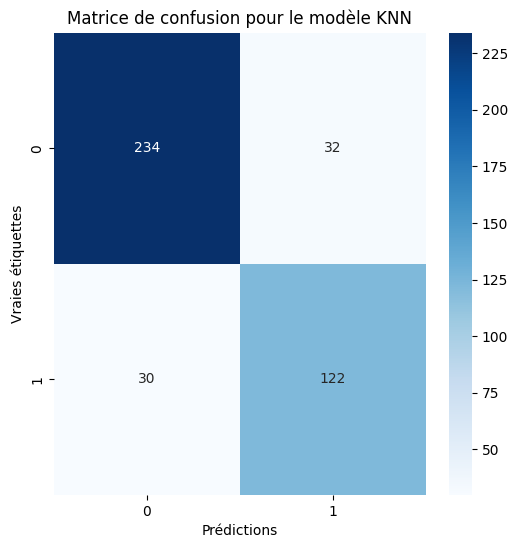

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       266
           1       0.79      0.80      0.80       152

    accuracy                           0.85       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.85      0.85      0.85       418



In [ ]:
# Calcul de la matrice de confusion
#fill_here
# Affichage de la matrice de confusion sous forme de heatmap avec Seaborn

#fill_here

# Affichage du rapport de classification(precision,recall et f1-score   )

#fill_here

### **Decision Tree**

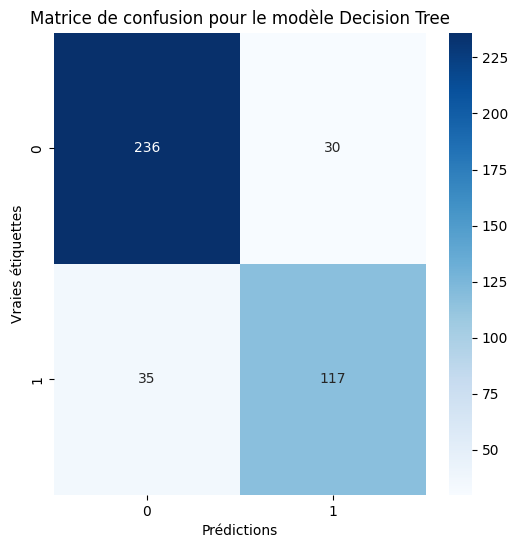

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       266
           1       0.80      0.77      0.78       152

    accuracy                           0.84       418
   macro avg       0.83      0.83      0.83       418
weighted avg       0.84      0.84      0.84       418



In [ ]:
# Calcul de la matrice de confusion
#fill_here
# Affichage de la matrice de confusion sous forme de heatmap avec Seaborn

#fill_here

# Affichage du rapport de classification(precision,recall et f1-score   )

#fill_here

### **Random Forest**

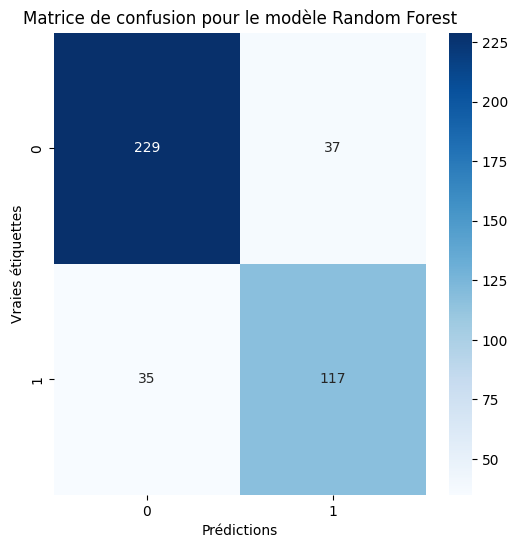

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       266
           1       0.76      0.77      0.76       152

    accuracy                           0.83       418
   macro avg       0.81      0.82      0.81       418
weighted avg       0.83      0.83      0.83       418



In [ ]:
# Calcul de la matrice de confusion
#fill_here
# Affichage de la matrice de confusion sous forme de heatmap avec Seaborn

#fill_here

# Affichage du rapport de classification(precision,recall et f1-score   )

#fill_here